<a href="https://colab.research.google.com/github/UEPP40/PUM/blob/Jablonski/09042024zad2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

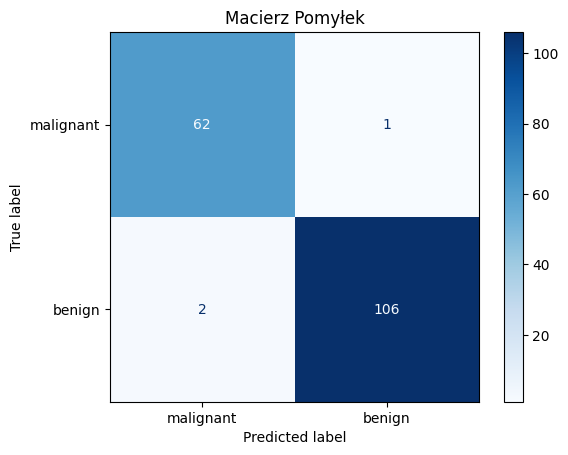

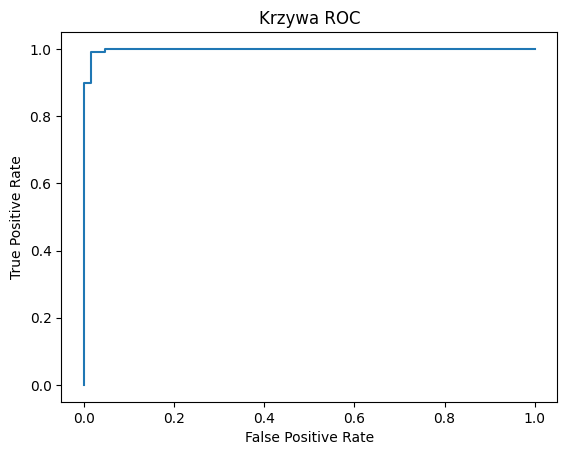

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, RocCurveDisplay, roc_curve
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = load_breast_cancer()
y = data.target
X = data.data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# zbiór danych na testowy  i uczący
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

#model regresji logistycznej
model = LogisticRegression()
model.fit(X_train, y_train)

#klasy dla zbioru testowego
y_pred = model.predict(X_test)

#macierz pomyłek
cm = confusion_matrix(y_test, y_pred)

# Wyświetl macierz pomyłek
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Macierz Pomyłek')
plt.show()

# Oblicz krzywą ROC
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

# Wyświetl krzywą ROC
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()
plt.title('Krzywa ROC')
plt.show()
